In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!pip install bentoml
!pip install fastai

     |████████████████████████████████| 3.0MB 2.8MB/s 
     |████████████████████████████████| 1.1MB 29.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 153kB 31.6MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 153kB 29.8MB/s 
     |████████████████████████████████| 2.7MB 29.8MB/s 
     |████████████████████████████████| 235kB 39.8MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 112kB 46.7MB/s 
     |████████████████████████████████| 143kB 43.1MB/s 
     |████████████████████████████████| 1.2MB 43.5MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
     |████████████████████████████████| 501kB 51.3MB/s 
     |████████████████████████████████| 204

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
path = untar_data(URLs.PETS)
path_anno = path/'annotations'
path_img = path/'images'

In [ ]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_91.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_199.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_146.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_186.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_152.jpg')]

In [ ]:
#bs = 64
bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

data = ImageDataBunch.from_name_re(
    path_img,
    fnames,
    pat,
    num_workers=0,
    ds_tfms=get_transforms(),
    size=224,
    bs=bs
).normalize(imagenet_stats)

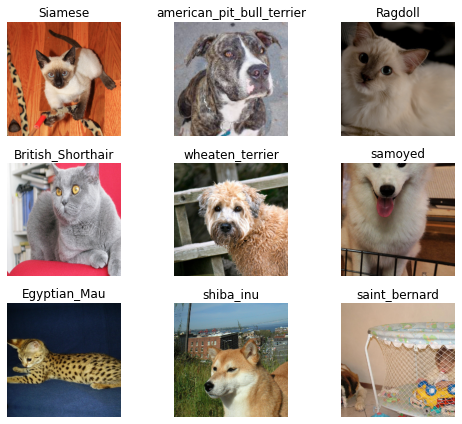

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
!git clone https://github.com/wshuyi/demo-image-classification-fastai.git

Cloning into 'demo-image-classification-fastai'...
remote: Enumerating objects: 382, done.
remote: Total 382 (delta 0), reused 0 (delta 0), pack-reused 382
Receiving objects: 100% (382/382), 52.42 MiB | 3.28 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
path = Path("demo-image-classification-fastai/imgs")

In [ ]:
path

PosixPath('demo-image-classification-fastai/imgs')

In [ ]:
!ls demo-image-classification-fastai/imgs/train

doraemon  walle


In [ ]:
data = ImageDataBunch.from_folder(path, test='test', ds_tfms=get_transforms(), size=224)
#data = ImageDataBunch.from_folder(path, train='train', size=224)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

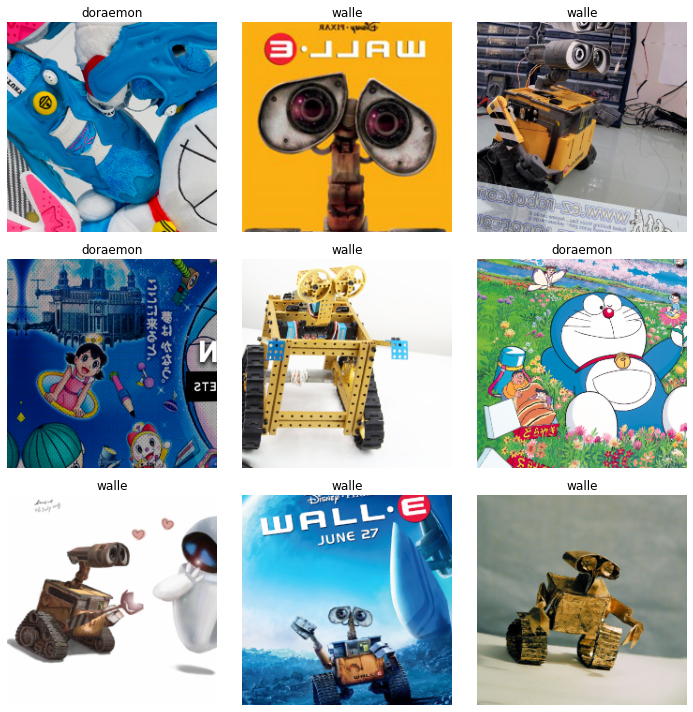

In [ ]:
data.show_batch(rows=3, figsize=(10,10))

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [ ]:

learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.552594,0.004880,1.000000,00:52


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

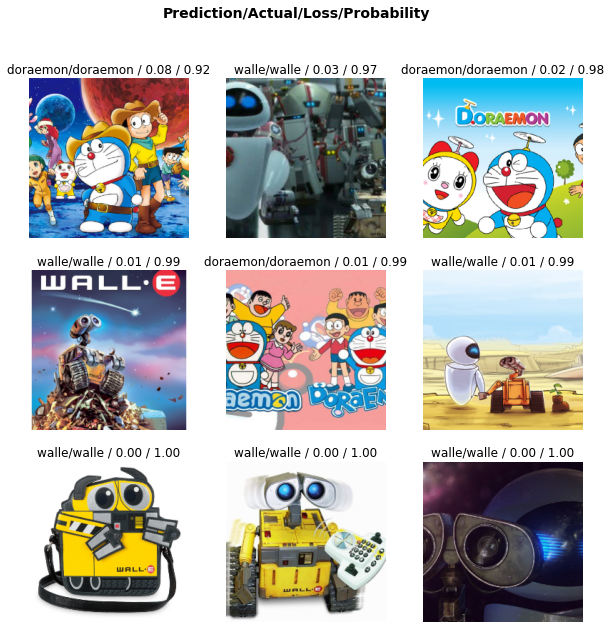

In [ ]:
interp.plot_top_losses(9, figsize=(10,10))

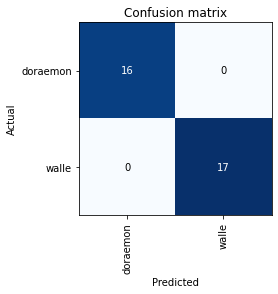

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
img = learn.data.train_ds[1][0]
#img = learn.data.test_ds[1][0]

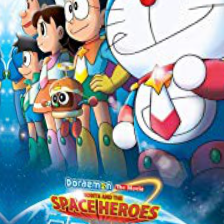

In [ ]:
img


In [ ]:
learn.predict(img)

(Category tensor(0), tensor(0), tensor([9.9996e-01, 3.9242e-05]))